It seems that Viking 2 has a completely different encoding. This notebook is a stripped down version of the Data exploration notebook purely for parsing and saving the underlying files.

Viking GCMS instrument data exploration and parsing
Casey Handmer
March 2019

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open("./Digital-files-raw-from-NSSDCA/5967 (VL-2)/DR005967_F00001.PHYS","rb") as f:
    rawdata = f.read()

In [5]:
from matplotlib import pyplot as plt

In [3]:
rawbin=np.array([[(rawdata[j]%2**(8-i))//2**(7-i) for i in range(8)] for j in range(len(rawdata))]).reshape(8*len(rawdata))

In [7]:
period1 = 62416

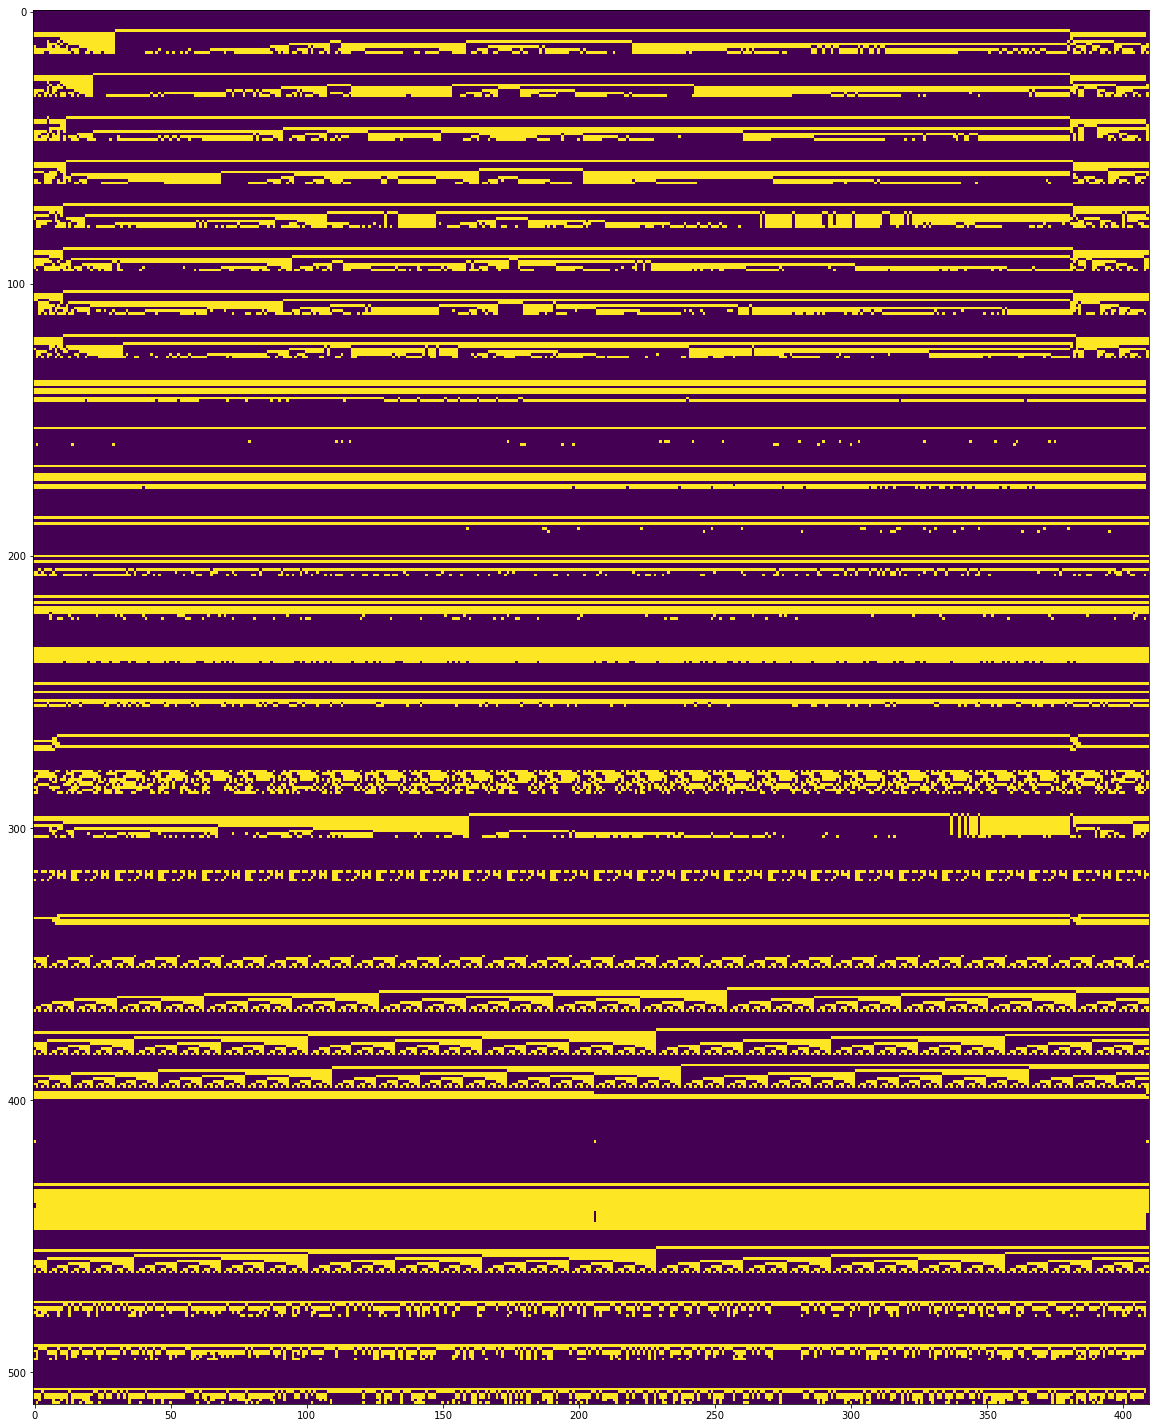

In [24]:
plt.figure(figsize=(20,40))
plt.imshow(np.transpose(rawbin[:period1*410].reshape((410,period1)))[512:1024])

Here, I'll plot the first 68 data channels as representative of the rest. 

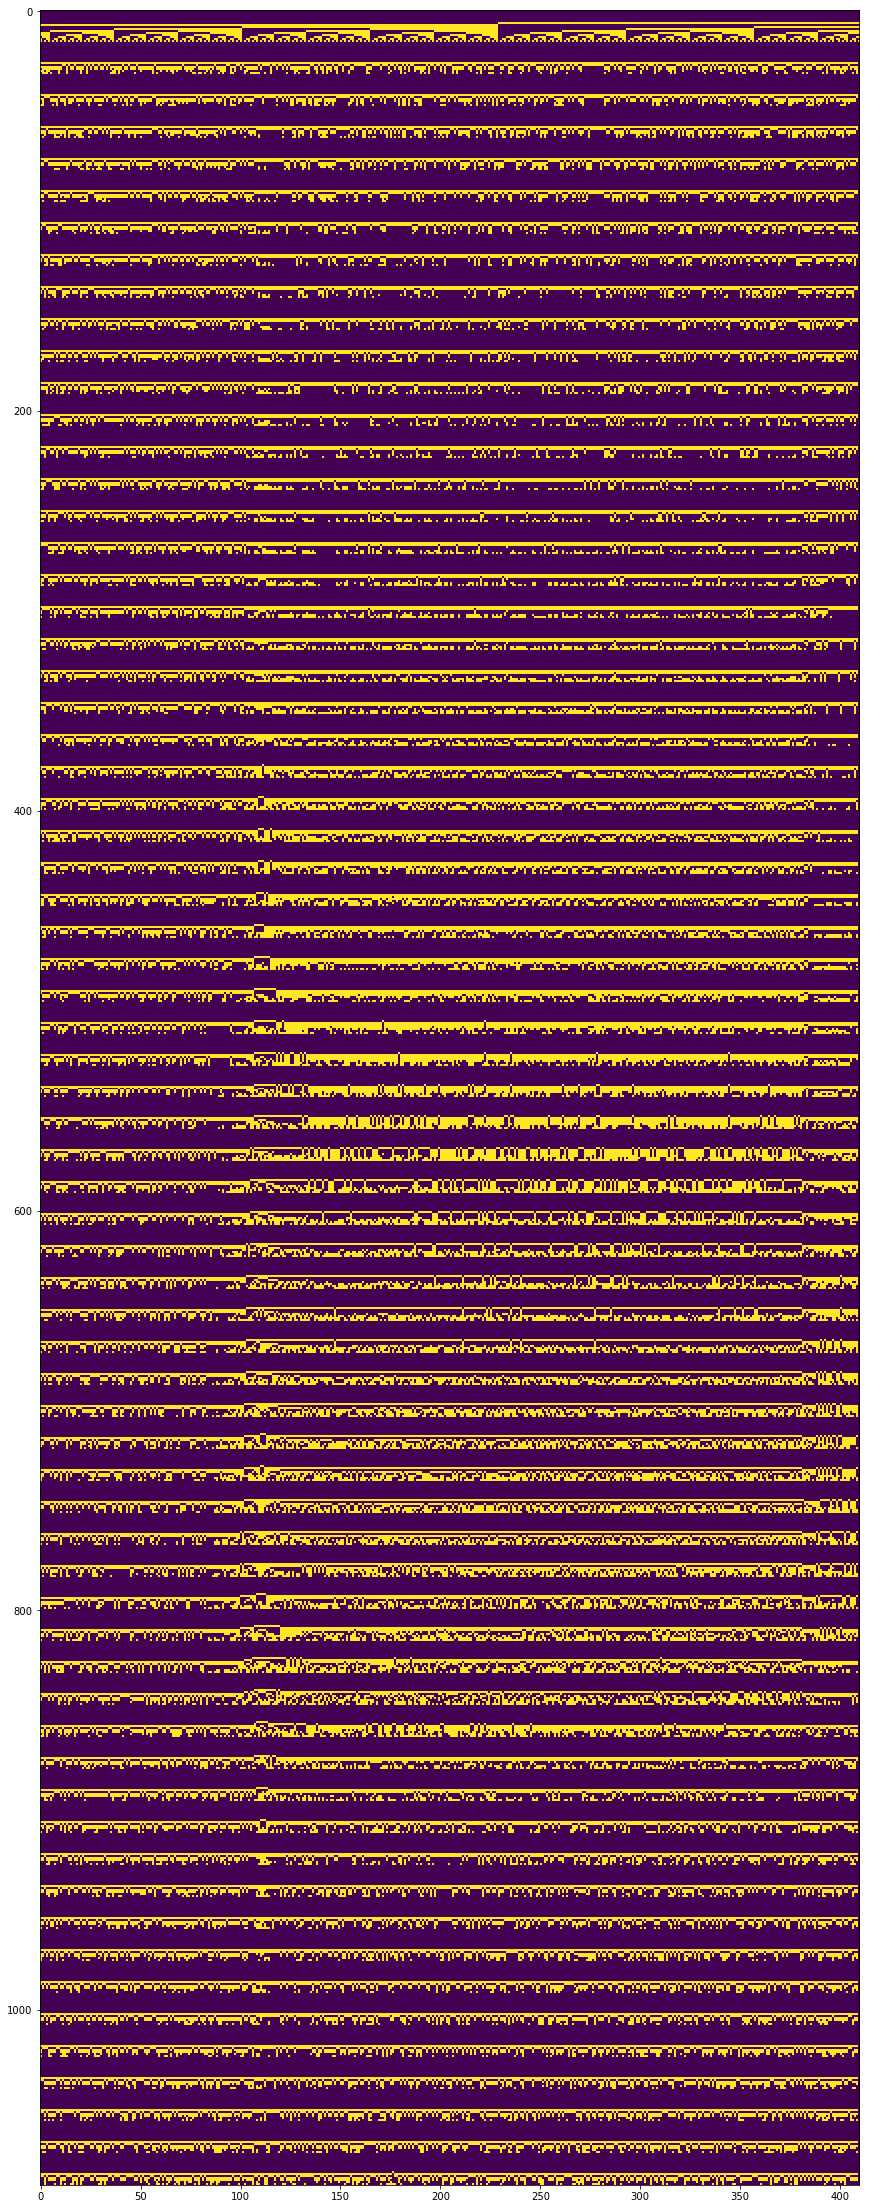

In [25]:
plt.figure(figsize=(20,40))
plt.imshow(np.transpose(rawbin[:period1*410].reshape((410,period1)))[1024-64:2048])

Let's take a look at the total data, since ripping it out shouldn't be that hard. First, the index corresponding to the last header channel.

In [18]:
alldata = np.array([np.array([np.dot(rawbin[period1*k+16*j:period1*k+16*(j+1)],np.flip([2**i for i in range(16)],axis=0)) for j in range(int(period1/16))]) for k in range(410)])

In [19]:
alldata.shape

(410, 3901)

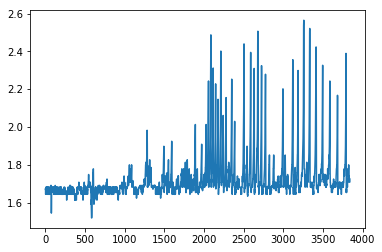

In [22]:
plt.plot(np.log10(alldata[1,61:]))

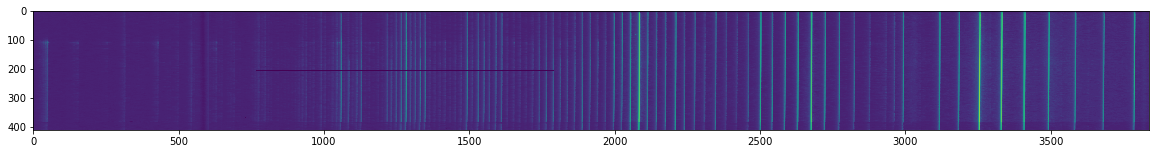

In [23]:
plt.figure(figsize=(20,10))
plt.imshow(alldata[:,61:])

In [379]:
np.savetxt("./recoveredcsvs/DR005967_F0000"+str(1)+".csv",alldata,delimiter=',')

In [44]:
filenames=['DR005967_F00001',
 'DR005967_F00002',
 'DR005967_F00003',
 'DR005967_F00004',
 'DR005967_F00005',
 'DR005967_F00006',
 'DR005967_F00007',
 'DR005967_F00008',
 'DR005967_F00009',
 'DR005967_F00010']

In [52]:
for file in filenames:
    with open("./Digital-files-raw-from-NSSDCA/5967 (VL-2)/"+file+".PHYS","rb") as f:
        rawdata = f.read()
    
    print(file)
    
    period1 = 62416
    
    rawbin=np.array([[(rawdata[j]%2**(8-i))//2**(7-i) for i in range(8)] for j in range(len(rawdata))]).reshape(8*len(rawdata))

    alldata = np.array([np.array([np.dot(rawbin[period1*k+16*j:period1*k+16*(j+1)],np.flip([2**i for i in range(16)],axis=0)) for j in range(int(period1/16))]) for k in range(int(len(rawbin)/period1))])

    np.savetxt("./recoveredcsvs/"+file+".csv",alldata,delimiter=',')

DR005967_F00001
DR005967_F00002
DR005967_F00003
DR005967_F00004
DR005967_F00005
DR005967_F00006
DR005967_F00007
DR005967_F00008
DR005967_F00009
DR005967_F00010


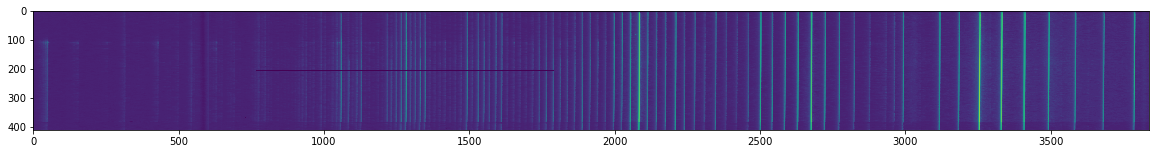

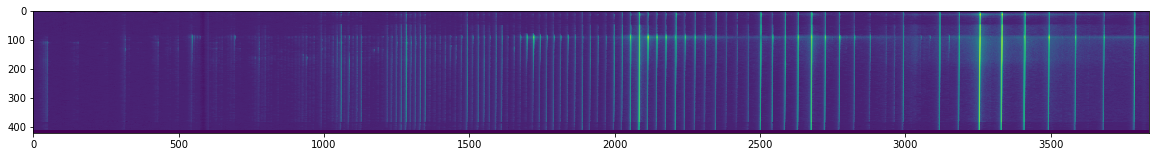

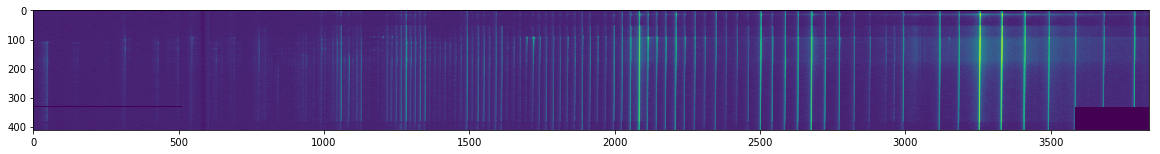

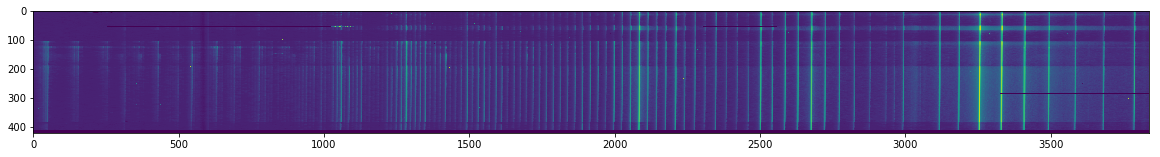

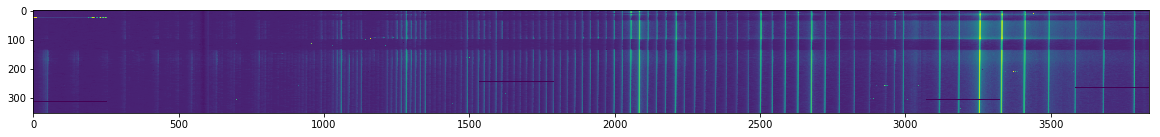

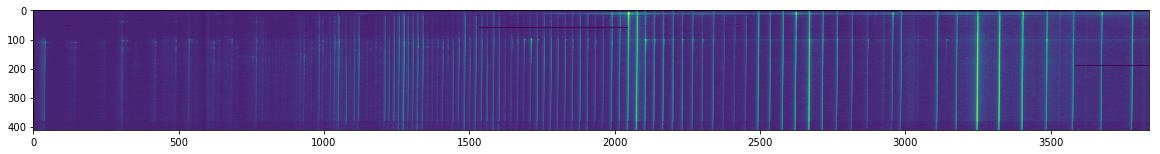

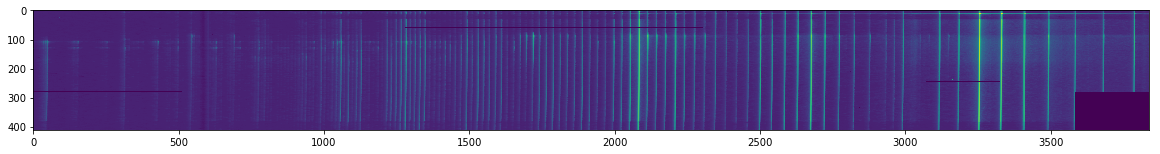

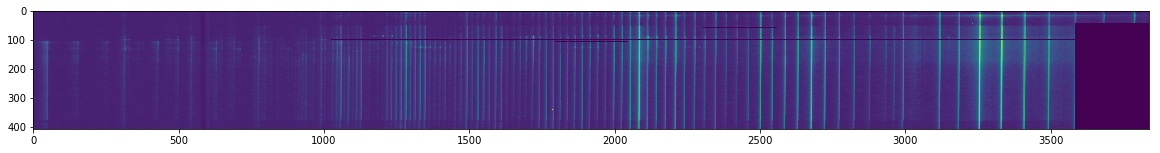

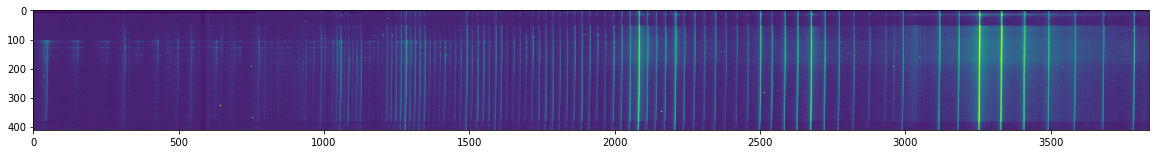

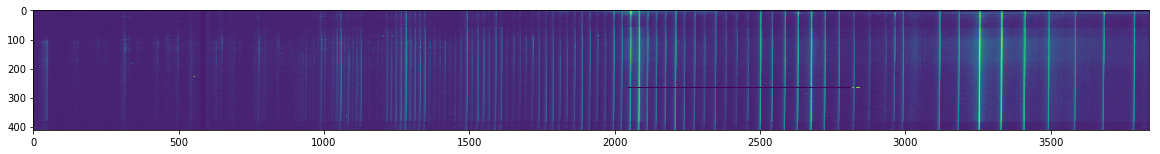

In [53]:
for file in filenames:
    plt.figure(figsize=(20,10))
    plt.imshow(np.genfromtxt("./recoveredcsvs/"+file+".csv", delimiter=',')[:,61:])

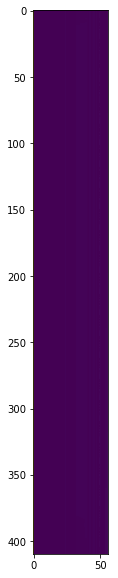

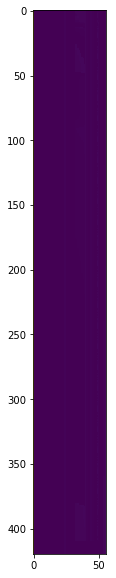

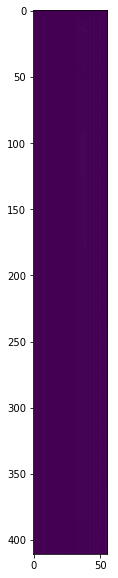

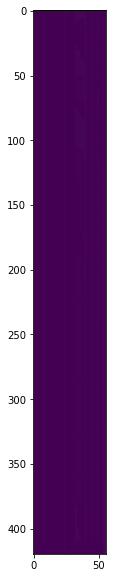

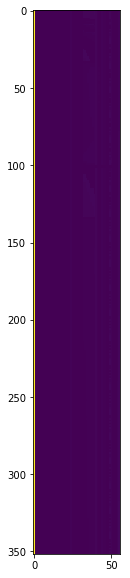

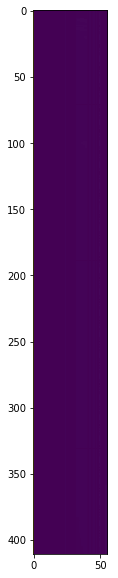

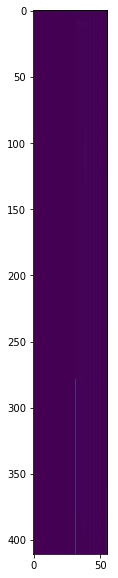

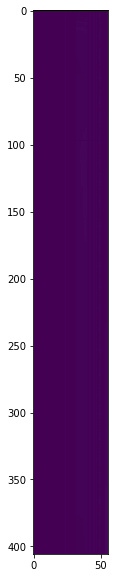

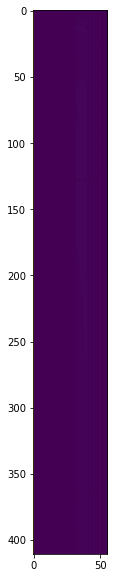

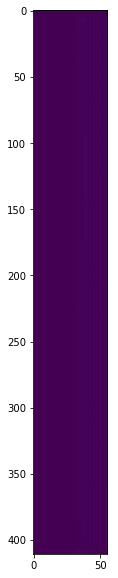

In [57]:
for file in filenames:
    plt.figure(figsize=(20,10))
    plt.imshow(np.genfromtxt("./recoveredcsvs/"+file+".csv", delimiter=',')[:,:56])